IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [39]:
# Importation des librairies standards:
import numpy as np
import copy
import statistics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [3]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256257
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344854987
col  13 :  Changement climatique 	moyenne =  5.420519666269368
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977354e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.016821692491061
col  16 :  Formation photochimique d'ozone 	moyenne =  0.021625918156535556
col  17 :  Particules fines 	moyenne =  5.735583075089393e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574097e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.8854543504171635e-09
col  20 :  Acidification terrestre et 

In [4]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [5]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [6]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458402
Transformation 	moyenne =  0.056136918226633296
Emballage 	moyenne =  0.02242675546471593
Transport 	moyenne =  0.026165883152808902
Supermarché et distribution 	moyenne =  0.007877125406877234
Consommation 	moyenne =  0.007633790367775129
Total 	moyenne =  0.6887371596646508
----
Agriculture.1 	moyenne =  4.2834051017208985
Transformation.1 	moyenne =  0.49566790046860953
Emballage.1 	moyenne =  0.2551146021668653
Transport.1 	moyenne =  0.31395988182510925
Supermarché et distribution.1 	moyenne =  0.03147132845606277
Consommation.1 	moyenne =  0.042848097985971396
Total.1 	moyenne =  5.422466912623516
----
Agriculture.2 	moyenne =  3.3849700977868895e-07
Transformation.2 	moyenne =  3.346837165345689e-08
Emballage.2 	moyenne =  8.733627654263806e-08
Transport.2 	moyenne =  7.395954808027414e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368693e-09
Consommation.2 	moyenne =  2.6369538328196267e-09
Total.2 	moy

In [7]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [8]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806652
11 :  Particules fines 	moyennne =  1.1694919040652128
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533454e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506685
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169783
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035649e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091264e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722688e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.01583401820414365
19 :  Utilisation du sol 	moyennne =  0.00017051056352429376
20 :  Épuisement des ressources eau 	moyennn

# Sommaire

## 1. Apprentissage supervisé
#### 1.1 Extraction des données pour la prédiction fromage
#### 1.2 Classification avec le KNN
#### 1.3 Classification avec le Perceptron

## 2. Apprentissage non supervisé
#### 2.1 Extraction des données
#### 2.2 Classification avec le KNN
#### 2.3 Classification avec le Perceptron

## Idées problématiques

- prédire si un aliment est un fromage  

- prédire sa catégorie en fonction de son impact environnemental

**KNN et Perceptron**
1. dataset avec pour label -1 des aliments non fromage (exemple) et 1 fromage 
2. entrainement des données
3. test 

=> test des differents k pour knn et (si pas la flemme test de w et epsilon)

**Clustering hierarchique et K-Moyenne**

### Etapes 
supervisé : KNN, Perceptron et Arbre
non supervisé : clustering, kmoyenne

## 1. **Apprentissage supervisé**
Dans cette partie, nous allons essayer de classifier des données en utilisant deux algorithmes de classification avec apprentissage supervisé : le KNN et le Perceptron Biais. 

**Problématique** : Peut-on prédire si un exemple est un fromage ou non, à partir des informations qui lui sont associées ?

### 1.1 **Extraction des données pour la prédiction fromage**

Tout d'abord, il faut préparer les données en leur donnant un label et en ne gardant que les attributs qui nous intéressent pour la classification. Pour cela :
- nous construisons un dataset qui contient une partie des exemples labelisés comme étant des fromages (label 1) et l'autre partie des exemples labelisés comme n'étant pas des fromages (label -1)
- nous enlevons certains attributs, en particulier les attributs catégoriels sous forme de chaîne de caractères.

In [4]:
#lecture des données 
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';')
print(str(data_synthese.columns))
data_synthese.drop(['Code AGB', 'Code CIQUAL', 'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d\'emballage'], axis=1, inplace = True)

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d'emballage', 'Préparation', 'DQR',
       'Score unique EF 3.1', 'Changement climatique',
       'Appauvrissement de la couche d'ozone', 'Rayonnements ionisants',
       'Formation photochimique d'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'],
      dtype='object')


In [6]:
# labelisation des exemples "fromages"
data_fromage = copy.deepcopy(data_synthese[data_synthese['Sous-groupe d\'aliment'] == 'fromages'])
data_fromage.drop(['Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Préparation'], axis=1, inplace = True)
Xnoms = data_fromage.columns
data_fromage.to_numpy()
label_fromage = np.asarray([1 for i in range(len(data_fromage))])

In [7]:
# labelisation des exemples "non fromages"
data_non_fromage = copy.deepcopy(data_synthese[data_synthese['Sous-groupe d\'aliment'] != 'fromages'])
data_non_fromage.drop(['Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Préparation'], axis=1, inplace = True)
data_non_fromage.to_numpy()
label_non_fromage = np.asarray([-1 for i in range(len(data_non_fromage))])

In [29]:
# on construit les dataset à partir de ces deux sous ensembles
X = np.vstack((data_fromage, data_non_fromage)) # data
Y = np.hstack((label_fromage, label_non_fromage)) #label
#print(X.shape[1])

### 1.2 **Classification avec KNN**

Dans cette partie nous essayons de répondre à notre problématique sur les fromages en utilisant le classifieur KNN. Nous utilisons les données qui ont été extraites ci-dessus. Les boîtes qui suivent ont pour objectif de :
- 1 : trouver le k optimal pour le KNN
- 2 : étudier l'évolution de l'accuracy au cours de l'apprentissage
- 3 : effectuer un test avec validation croisée en 10
- 4 : mesurer le temps d'exécution nécessaire pour la classification

### Recherche du k optimal pour la classification
On recherche le k qui donne le meilleur taux de bonne classification (accuracy). Pour chaque valeur de k, on effectue une validation croisée pour obtenir des réultats plus fiables.

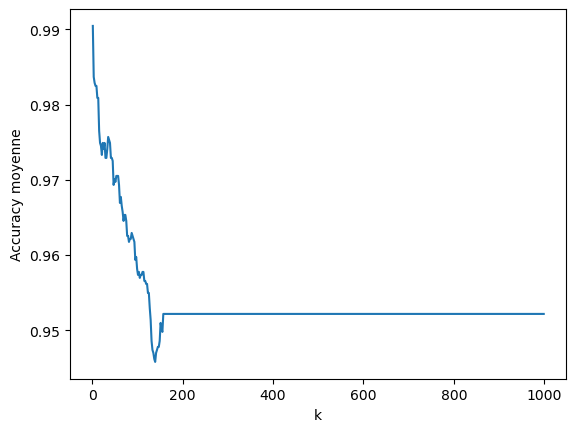

Accuracy maximum pour k = 1


In [30]:
index = np.random.permutation(len(X))
Xm = X[index]
Ym = Y[index]

dim = X.shape[1]
accuracies_test = []
nb_iter = 10 #nombre d'itérations de la validation croisée
seuil_k = 1000 # seuil max des valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,2)] # toutes les valeurs de k à regarder

for k in valeurs_k:
    perf_test = [] #tableau des accuracies pour cette valeur de k

    #validation croisée
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
        un_KNN = cl.ClassifierKNN(dim, k)
        un_KNN.train(Xapp, Yapp)
        perf_test.append(un_KNN.accuracy(Xtest, Ytest))
        
    acc_moy_test = statistics.mean(perf_test) # moyenne des accuracies de la validation croisée pour cette valeur de k
    accuracies_test.append(acc_moy_test)


# Traçage de la courbe des variations d'accuracy
plt.plot(valeurs_k,accuracies_test)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("k")
plt.show()

print("Accuracy maximum pour k =", valeurs_k[accuracies_test.index(max(accuracies_test))])

### Evolution de l'accuracy au cours de l'apprentissage
Nous entraînons le classifier KNN plusieurs fois de suite avec le même ensemble de données, pour voir si l'accuracy augmente.

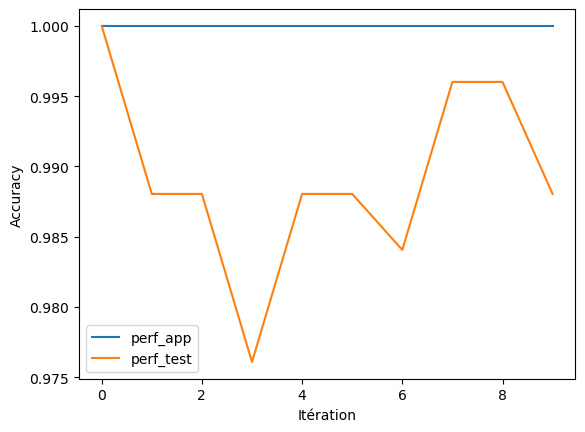

Accuracy moyenne apprentissage :  1.0
Accuracy moyenne test :  0.9892430278884462


In [31]:
nb_iter = 10
perf_app = []
perf_test = []
dim = X.shape[1]

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]


# réaliser une validation croisée 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = cl.ClassifierKNN(dim, 1)
    un_KNN.train(Xapp, Yapp)
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    
    
# Traçage de la courbe des variations d'accuracy
plt.plot(range(nb_iter),perf_app, perf_test)  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.legend(['perf_app','perf_test'])
plt.show()

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))

### Validation croisée en 10
Cette étude permet de mesurer la capacité du KNN à généraliser sur de nouvelles données (données de test différentes des données d'apprentissage) en utilisant la méthode de la validation croisée.

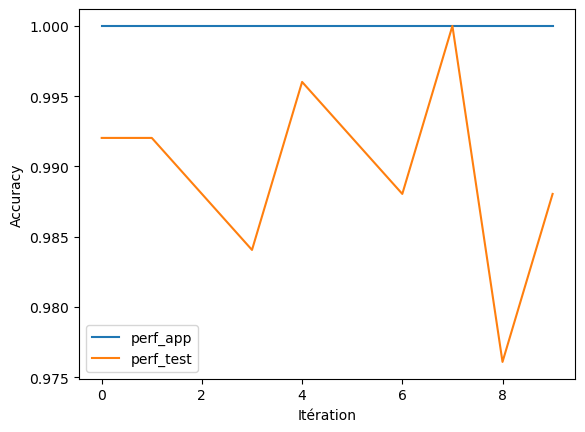

Accuracy moyenne apprentissage :  1.0
Accuracy moyenne test :  0.9896414342629483


In [32]:
nb_iter = 10
perf_app = []
perf_test = []
dim = X.shape[1]

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

# réaliser une validation croisée 
for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = cl.ClassifierKNN(dim, 1)
    un_KNN.train(Xapp, Yapp)
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    
    
# Traçage de la courbe des variations d'accuracy
plt.plot(range(nb_iter),perf_app, perf_test)  
plt.ylabel('Accuracy')
plt.xlabel("Itération")
plt.legend(['perf_app','perf_test'])
plt.show()


#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))

### Temps d'exécution
Etude du temps que le KNN met à s'entraîner puis à classifier

In [33]:
import time

nb_iter = 10
perf_app = []
perf_test = []
train_time = []
predict_time = []
dim = X.shape[1]

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    un_KNN = cl.ClassifierKNN(dim, 1)

    start_time = time.time()
    un_KNN.train(Xapp, Yapp)
    train_time.append(time.time() - start_time)

    start_time = time.time()
    perf_app.append(un_KNN.accuracy(Xapp, Yapp))
    perf_test.append(un_KNN.accuracy(Xtest, Ytest))
    predict_time.append(time.time() - start_time)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))
print("Temps d'entraînement moyen : ", statistics.mean(train_time))
print("Temps de prédiction moyen : ", statistics.mean(predict_time))

Accuracy moyenne apprentissage :  1.0
Accuracy moyenne test :  0.9904382470119522
Temps d'entraînement moyen :  0.0
Temps de prédiction moyen :  1.4531497001647948


### **Conclusion pour le KNN**

### 1.3 **Classification avec Perceptron Biais**

Dans cette partie nous essayons de répondre à notre problématique sur les fromages en utilisant le classifieur Perceptron Biais. Nous utilisons les données qui ont été extraites ci-dessus. Les boîtes qui suivent ont pour objectif de :
- 1 & 2 : étude de l'impact des initialisations différentes de w et la variation du learning rate
- 3 : étudier l'évolution du coût au cours de l'apprentissage
- 4 : effectuer un test avec validation croisée en 10
- 5 : mesurer le temps d'exécution nécessaire pour la classification

### Variation de l'accuracy en fonction du learning rate, avec poids initial  w = 0

C:\Users\Milly\Downloads\TME_DataScience\projet-2\..\iads\Classifiers.py:242: RuntimeWarning: overflow encountered in multiply
  self.w = self.w + self.learning_rate * (yi - p) * desc_copie[i]


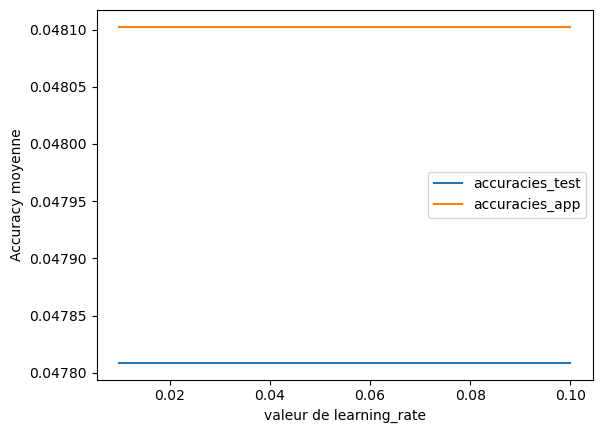

In [43]:
index = np.random.permutation(len(X))
Xm = X[index]
Ym = Y[index]

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)
dim = X.shape[1]

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = cl.ClassifierPerceptronBiais(dim,e)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("test e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("app e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e,accuracies)
plt.plot(valeurs_e,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

### Variation de l'accuracy en fonction du learning rate, avec poids initial  w = aléatoire

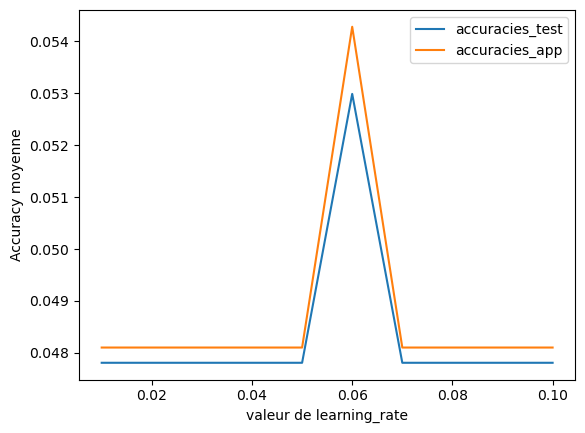

In [45]:
index = np.random.permutation(len(X))
Xm = X[index]
Ym = Y[index]

accuracies = []
accuracies_app = []
acc_moy = []
acc_moy_app = []
nb_iter = 10
valeurs_e = np.arange(0.01, 0.11, 0.01)
dim = X.shape[1]

#on fait varier le paramètre learning_rate
for e in valeurs_e:
    perf = []
    perf_app = []
    for i in range(nb_iter):
        Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
        perceptron = cl.ClassifierPerceptronBiais(dim,e, False)
        perceptron.train(Xapp, Yapp)
        perf.append(perceptron.accuracy(Xtest, Ytest))
        perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
    acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
    acc_moy_app = statistics.mean(perf_app) 
    accuracies.append(acc_moy)
    accuracies_app.append(acc_moy_app)
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
    #print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


# Traçage de la courbe des variations d'accuracy en fonction de learning_rate
plt.plot(valeurs_e ,accuracies)
plt.plot(valeurs_e ,accuracies_app)
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de learning_rate")
plt.legend(['accuracies_test','accuracies_app'])
plt.show()

### Etude de l'évolution du coût au cours de l'apprentissage
Ce test permet d'étudier la vitesse de convergence de l'algorithme, à l'aide de la variation du coût au fil de l'apprentissage

Nb iterations réalisées:  100


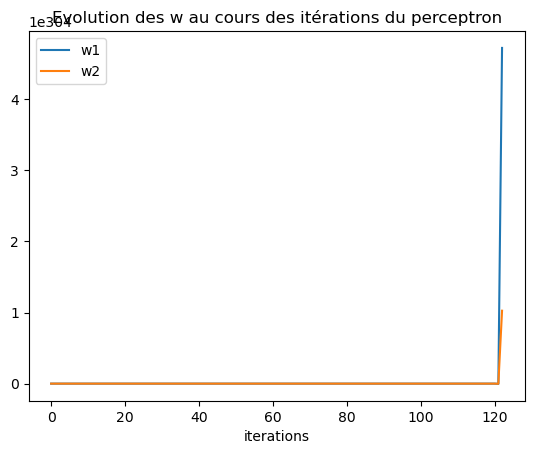

In [46]:
# étude de la variation des poids (on en a besoin pour calculer le coût)

index = np.random.permutation(len(X)) # mélange des index
Xm2 = X[index]
Ym2 = Y[index]

# Paramètres pour le perceptron:
dim = X.shape[1]
eps = 0.09    # learning rate
poids_0 = False   # valeur initiale des poids à 0

perceptron = cl.ClassifierPerceptronBiais(dim, learning_rate=eps, init=poids_0)

les_differences = perceptron.train(Xm2, Ym2, nb_max=100)
print("Nb iterations réalisées: ", len(les_differences))

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw2 = np.array(perceptron.get_allw()) 

# Tracé de l'évolution des w:
plt.figure()
plt.plot(allw2[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw2[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])

C:\Users\Milly\AppData\Local\Temp\ipykernel_3108\164360897.py:13: RuntimeWarning: overflow encountered in double_scalars
  cout += max(0, 1 - score * Ym2[i])


min_cout: 0
 -> w: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


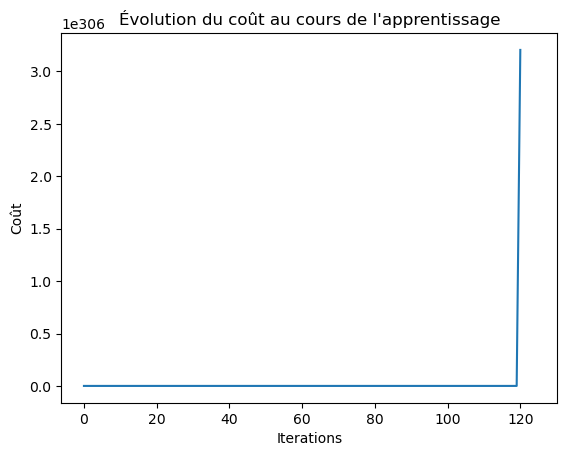

In [47]:
# étude de la variation du coût

# on considère les poids générés dans la boite précédente:
allw2 = np.array(perceptron.get_allw()) 

# ------------------------  A COMPLETER :
tabc = []
for w in allw2:
    cout = 0
    for i in range(len(Xm2)):
        score = np.dot(w, Xm2[i])
        if score * Ym2[i] < 1:
            cout += max(0, 1 - score * Ym2[i])
    tabc.append(cout)

print("min_cout: " + str(min(tabc)))
print(" -> w: " + str(allw2[tabc.index(min(tabc))]))
plt.figure()
plt.plot(tabc)
plt.xlabel('Iterations')
plt.ylabel('Coût')
plt.title('Évolution du coût au cours de l\'apprentissage')
plt.show() 

### Validation croisée en 10

e = 0.01 Taux de bonne classification moyen : 0.04820717131474103
e = 0.01 Taux de bonne classification moyen : 0.048984995586937335


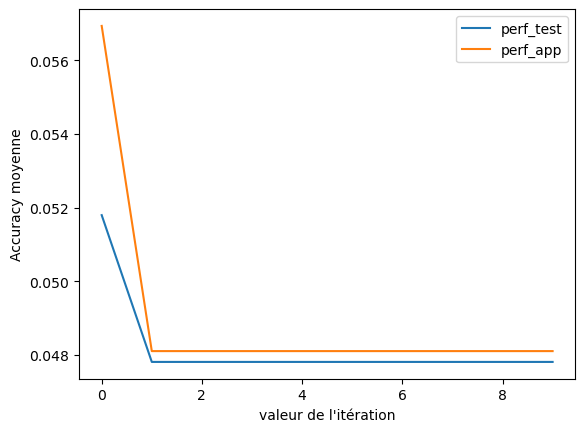

Accuracy moyenne apprentissage :  0.048984995586937335
Accuracy moyenne test :  0.04820717131474103


In [48]:
index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

nb_iter = 10
e = 0.09
perf = []
perf_app = []
dim = X.shape[1]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = cl.ClassifierPerceptronBiais(dim,e,False)
    perceptron.train(Xapp, Yapp)
    perf.append(perceptron.accuracy(Xtest, Ytest))
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    
acc_moy = statistics.mean(perf) #moyenne des accuracies de la validation croisée pour cette valeur de k
acc_moy_app = statistics.mean(perf_app) 

print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy))
print("e = " + str(e) + " Taux de bonne classification moyen : " + str(acc_moy_app))


plt.plot(np.arange(0, nb_iter),perf, perf_app)  
plt.ylabel('Accuracy moyenne')
plt.xlabel("valeur de l'itération")
plt.legend(['perf_test','perf_app'])
plt.show()

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf))

### Temps d'exécution

In [50]:
import time

nb_iter = 10
perf_app = []
perf_test = []
train_time = []
predict_time = []
dim = X.shape[1]

index = np.random.permutation(len(X)) # mélange des index
Xm = X[index]
Ym = Y[index]

for i in range(nb_iter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval_strat(Xm, Ym, nb_iter, i)
    perceptron = cl.ClassifierPerceptronBiais(dim,0.01, False)
    start_time = time.time()
    perceptron.train(Xapp, Yapp)
    train_time.append(time.time() - start_time)

    start_time = time.time()
    perf_app.append(perceptron.accuracy(Xapp, Yapp))
    perf_test.append(perceptron.accuracy(Xtest, Ytest))
    predict_time.append(time.time() - start_time)

#print("Accuracies apprentissage obtenues : ",perf_app)    
#print("Accuracies test obtenues : ",perf_test)
print("Accuracy moyenne apprentissage : ", statistics.mean(perf_app))
print("Accuracy moyenne test : ", statistics.mean(perf_test))
print("Temps d'entraînement moyen : ", statistics.mean(train_time))
print("Temps de prédiction moyen : ", statistics.mean(predict_time))

Accuracy moyenne apprentissage :  0.04810238305383936
Accuracy moyenne test :  0.04780876494023904
Temps d'entraînement moyen :  48.16666922569275
Temps de prédiction moyen :  0.015143799781799316


### Conclusion pour le Perceptron Biais

### 1.4 **Classification avec Arbre ???**

In [22]:
seuils_entropie = np.arange(0.0, 1.01, 0.1)
liste_perf_moy = []
dim = 18
nb_iter = 10


for s in seuils_entropie :   
    arbre = cl.ClassifierArbreNumerique(dim,s, Xnoms)
    perf, perf_moy, perf_sd = cl.validation_croisee(arbre, (X,Y), nb_iter)
    liste_perf_moy.append(perf_moy)
    print("\nseuil ", s, 'accuracy moyenne: {perf_moy:.3f}\técart type: {perf_sd:.3f}')
          
          
# affichage de la variation de l'accuracy en fonction du choix du seuil:
plt.plot(liste_perf_moy,seuils_entropies)
plt.ylabel('entropie')
plt.xlabel('seuil')
plt.show()

AttributeError: module 'iads.Classifiers' has no attribute 'ClassifierArbreNumerique'

## 2. **Apprentissage non supervisé**


### 2.1 Classification Clustering

### Extraction des données

In [88]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';')
data_synthese.drop(['Code AGB', 'Code CIQUAL', 'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d\'emballage', 'Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Préparation'], axis=1, inplace = True)


### Classification

Distance minimale trouvée entre [0, 4] = 0.0
Distance minimale trouvée entre [3, 8] = 0.0
Distance minimale trouvée entre [5, 24] = 0.0
Distance minimale trouvée entre [7, 67] = 0.0
Distance minimale trouvée entre [9, 51] = 0.0
Distance minimale trouvée entre [12, 22] = 0.0
Distance minimale trouvée entre [21, 27] = 0.0
Distance minimale trouvée entre [29, 35] = 0.0
Distance minimale trouvée entre [33, 41] = 0.0
Distance minimale trouvée entre [42, 60] = 0.0
Distance minimale trouvée entre [43, 50] = 0.0
Distance minimale trouvée entre [46, 49] = 0.0
Distance minimale trouvée entre [62, 75] = 0.0
Distance minimale trouvée entre [63, 68] = 0.0
Distance minimale trouvée entre [69, 205] = 0.0
Distance minimale trouvée entre [74, 130] = 0.0
Distance minimale trouvée entre [76, 206] = 0.0
Distance minimale trouvée entre [77, 131] = 0.0
Distance minimale trouvée entre [86, 87] = 0.0
Distance minimale trouvée entre [102, 103] = 0.0
Distance minimale trouvée entre [105, 108] = 0.0
Distance min

Distance minimale trouvée entre [306, 335] = 0.16470544876735613
Distance minimale trouvée entre [316, 339] = 0.16758281754666302
Distance minimale trouvée entre [337, 342] = 0.16483578143914782
Distance minimale trouvée entre [260, 318] = 0.1730064974438415
Distance minimale trouvée entre [90, 262] = 0.17774880862217807
Distance minimale trouvée entre [99, 107] = 0.17894781730162498
Distance minimale trouvée entre [95, 315] = 0.18274103182609752
Distance minimale trouvée entre [94, 218] = 0.18561484918793497
Distance minimale trouvée entre [30, 160] = 0.18741753402187722
Distance minimale trouvée entre [338, 346] = 0.19151559302152987
Distance minimale trouvée entre [312, 347] = 0.19922219582361733
Distance minimale trouvée entre [101, 348] = 0.20379757499957
Distance minimale trouvée entre [343, 344] = 0.2043652687221603
Distance minimale trouvée entre [65, 353] = 0.2147978481445407
Distance minimale trouvée entre [194, 231] = 0.21728700081548963
Distance minimale trouvée entre [71, 

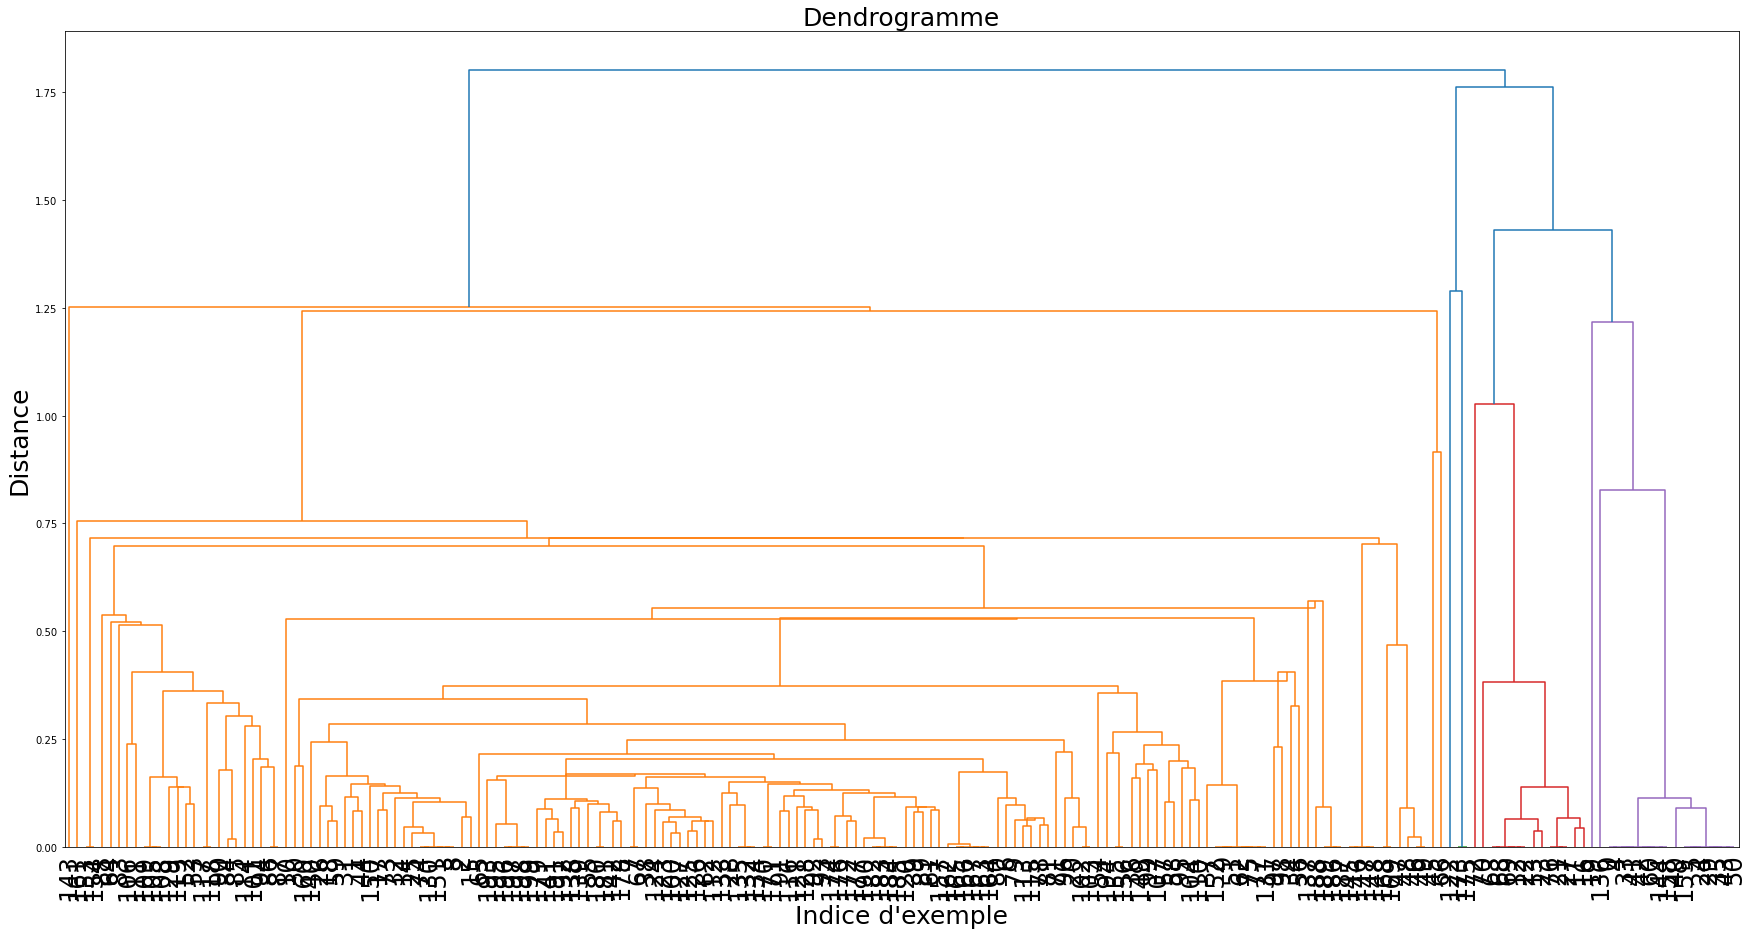

In [89]:
data_synthese = copy.deepcopy(data_synthese[:200])
clust.normalisation(data_synthese)
res_centroid = clust.CHA(data_synthese,linkage='centroid',verbose=True,dendrogramme=True)

Distance minimale trouvée entre [0, 4] = 0.0
Distance minimale trouvée entre [3, 8] = 0.0
Distance minimale trouvée entre [5, 24] = 0.0
Distance minimale trouvée entre [7, 67] = 0.0
Distance minimale trouvée entre [9, 51] = 0.0
Distance minimale trouvée entre [12, 22] = 0.0
Distance minimale trouvée entre [21, 27] = 0.0
Distance minimale trouvée entre [29, 35] = 0.0
Distance minimale trouvée entre [33, 41] = 0.0
Distance minimale trouvée entre [42, 60] = 0.0
Distance minimale trouvée entre [43, 50] = 0.0
Distance minimale trouvée entre [46, 49] = 0.0
Distance minimale trouvée entre [62, 75] = 0.0
Distance minimale trouvée entre [63, 68] = 0.0
Distance minimale trouvée entre [69, 205] = 0.0
Distance minimale trouvée entre [74, 130] = 0.0
Distance minimale trouvée entre [76, 206] = 0.0
Distance minimale trouvée entre [77, 131] = 0.0
Distance minimale trouvée entre [86, 87] = 0.0
Distance minimale trouvée entre [102, 103] = 0.0
Distance minimale trouvée entre [105, 108] = 0.0
Distance min

Distance minimale trouvée entre [288, 293] = 0.21809744779582363
Distance minimale trouvée entre [313, 317] = 0.21812579214102706
Distance minimale trouvée entre [97, 98] = 0.23069232213714475
Distance minimale trouvée entre [101, 111] = 0.23099494844671437
Distance minimale trouvée entre [320, 344] = 0.23137167356991176
Distance minimale trouvée entre [301, 332] = 0.23227695189067493
Distance minimale trouvée entre [325, 330] = 0.23866713886170812
Distance minimale trouvée entre [304, 336] = 0.24509855016910223
Distance minimale trouvée entre [221, 329] = 0.24783316968957456
Distance minimale trouvée entre [106, 346] = 0.25166624606448806
Distance minimale trouvée entre [71, 339] = 0.2654406592288369
Distance minimale trouvée entre [338, 347] = 0.2705101703653992
Distance minimale trouvée entre [337, 341] = 0.2795182157683279
Distance minimale trouvée entre [335, 340] = 0.2822373640255673
Distance minimale trouvée entre [140, 356] = 0.30494606837808474
Distance minimale trouvée entre 

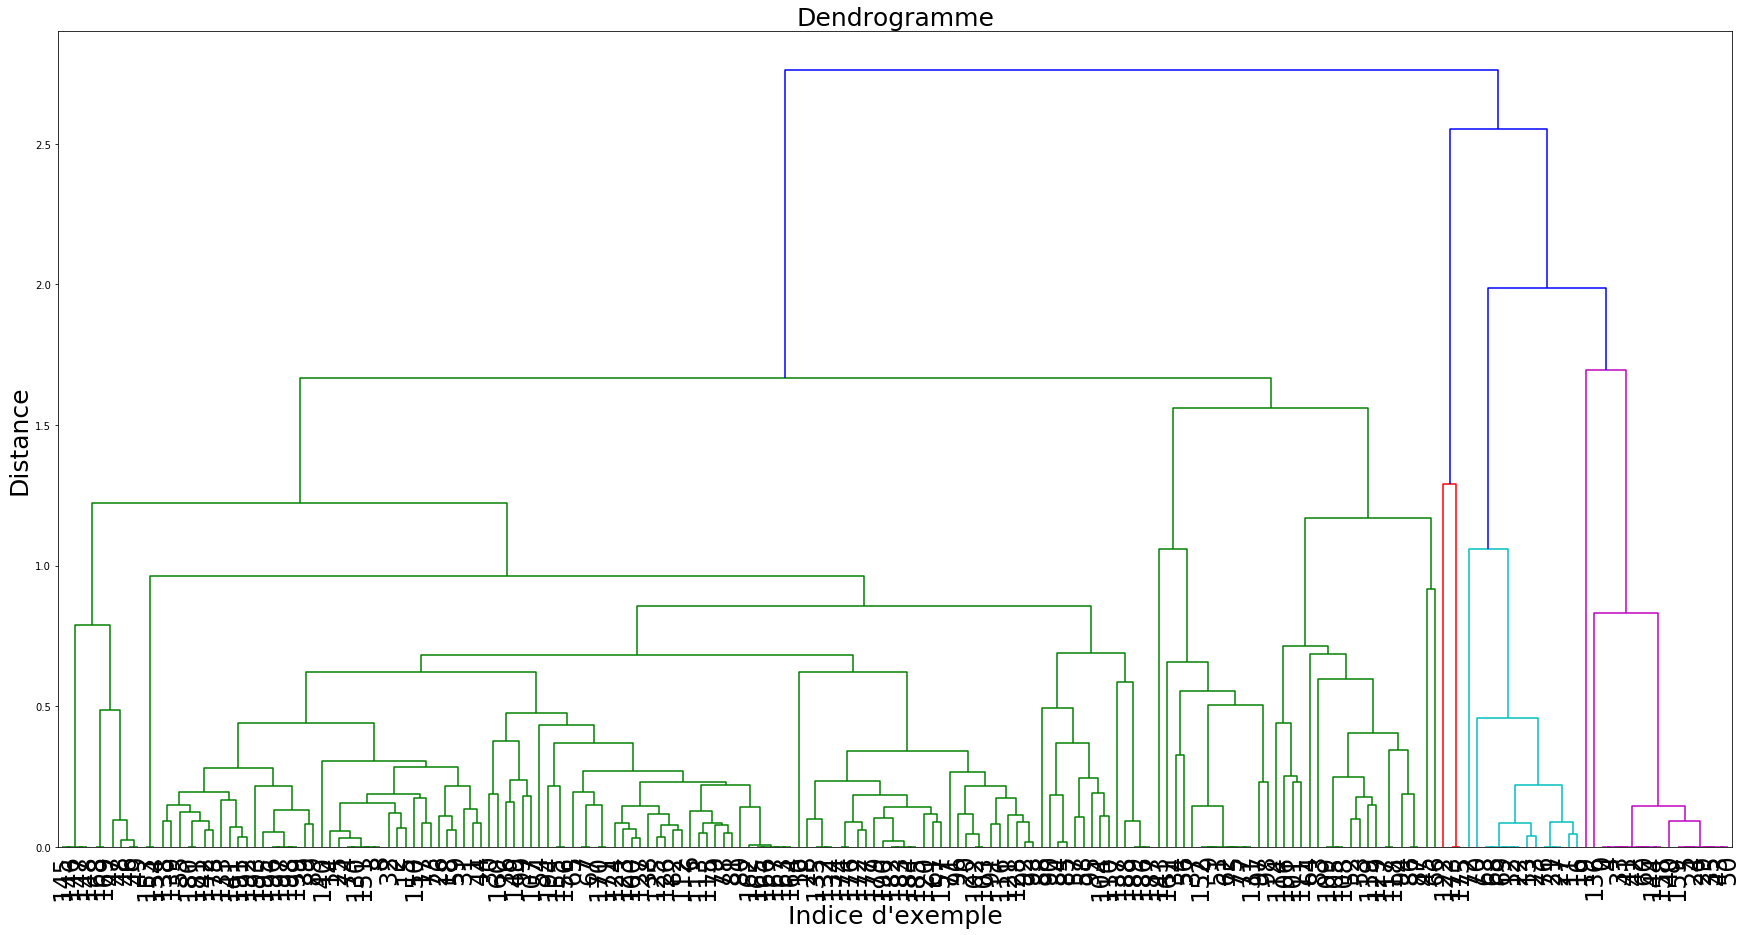

In [20]:
data_synthese = copy.deepcopy(data_synthese[:200])
clust.normalisation(data_synthese)
res_centroid = clust.CHA(data_synthese,linkage='complete',verbose=True,dendrogramme=True)

In [ ]:
data_synthese = copy.deepcopy(data_synthese[:200])
clust.normalisation(data_synthese)
res_centroid = clust.CHA(data_synthese,linkage='simple',verbose=True,dendrogramme=True)

In [ ]:
data_synthese = copy.deepcopy(data_synthese[:200])
clust.normalisation(data_synthese)
res_centroid = clust.CHA(data_synthese,linkage='average',verbose=True,dendrogramme=True)

In [26]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';')
data_viande_ref = copy.deepcopy(data_synthese[data_synthese['Groupe d\'aliment'] == 'viandes, œufs, poissons'])
print(data_viande_ref.shape)
for i in data_synthese['Groupe d\'aliment']:
    print(i)


(645, 29)
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaires et ingrédients divers
aides culinaire

In [13]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';')
data_viande_ref = copy.deepcopy(data_synthese[data_synthese['Groupe d\'aliment'] == 'viandes, œufs, poissons'])


data_viande = copy.deepcopy(data_synthese[data_synthese['Groupe d\'aliment'] == 'viandes, œufs, poissons'])
data_viande.drop(['Code AGB', 'Code CIQUAL', 'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d\'emballage', 'Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Préparation', 'DQR', 'Score unique EF 3.1',
                  'Changement climatique', 'Appauvrissement de la couche d\'ozone','Rayonnements ionisants', 'Formation photochimique d\'ozone',
                 'Particules fines',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d\'eau douce'], axis=1, inplace = True)
Xnoms = data_viande.columns
data_viande.to_numpy()

array([[4.07e-08, 3.79e-09, 6.67e+01, 1.59e+00, 9.12e+01, 2.22e-05],
       [1.00e-06, 2.78e-08, 5.58e+03, 1.64e+01, 1.48e+02, 8.12e-05],
       [7.90e-07, 2.19e-08, 4.41e+03, 1.29e+01, 1.07e+02, 6.16e-05],
       ...,
       [9.08e-08, 4.02e-09, 1.47e+01, 5.59e-01, 6.06e+01, 1.63e-04],
       [1.14e-07, 5.00e-09, 1.87e+01, 6.43e-01, 8.63e+01, 2.03e-04],
       [8.58e-08, 4.91e-09, 3.42e+02, 4.03e+00, 9.64e+01, 2.54e-05]])

In [84]:
clust.normalisation(data_viande)
res_centroid = clust.CHA(data_viande,linkage='centroid',verbose=True,dendrogramme=True)

Distance minimale trouvée entre [1, 13] = 0.0
Distance minimale trouvée entre [2, 3] = 0.0
Distance minimale trouvée entre [4, 6] = 0.0
Distance minimale trouvée entre [5, 7] = 0.0
Distance minimale trouvée entre [8, 15] = 0.0
Distance minimale trouvée entre [9, 10] = 0.0
Distance minimale trouvée entre [11, 12] = 0.0
Distance minimale trouvée entre [14, 17] = 0.0
Distance minimale trouvée entre [16, 19] = 0.0
Distance minimale trouvée entre [18, 140] = 0.0
Distance minimale trouvée entre [20, 21] = 0.0
Distance minimale trouvée entre [23, 24] = 0.0
Distance minimale trouvée entre [25, 26] = 0.0
Distance minimale trouvée entre [27, 28] = 0.0
Distance minimale trouvée entre [29, 30] = 0.0
Distance minimale trouvée entre [31, 657] = 0.0
Distance minimale trouvée entre [32, 34] = 0.0
Distance minimale trouvée entre [33, 194] = 0.0
Distance minimale trouvée entre [35, 615] = 0.0
Distance minimale trouvée entre [36, 37] = 0.0
Distance minimale trouvée entre [39, 41] = 0.0
Distance minimale 

KeyboardInterrupt: 

In [ ]:
res_complete = clust.CHA(data_viande,linkage='complete',verbose=True,dendrogramme=True)

In [ ]:
res_simple = clust.CHA(data_viande,linkage='simple',verbose=True,dendrogramme=True)

In [ ]:
res_centroid = clust.CHA(data_synthese,linkage='average',verbose=True,dendrogramme=True)

### 2.2 Classification avec K-means

### Extraction des données

In [112]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';')

In [285]:
data_viande_ref = copy.deepcopy(data_synthese[data_synthese['Groupe d\'aliment'] == 'matières grasses'])

data_viande = copy.deepcopy(data_synthese[data_synthese['Groupe d\'aliment'] == 'matières grasses'])
data_viande.drop(['Code AGB', 'Code CIQUAL', 'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d\'emballage', 'Groupe d\'aliment', 'Sous-groupe d\'aliment', 'Préparation', 'DQR',
                  'Changement climatique','Rayonnements ionisants', 'Formation photochimique d\'ozone', 'Eutrophisation eaux douces',
       'Eutrophisation marine',
       'Écotoxicité pour écosystèmes aquatiques d\'eau douce'], axis=1, inplace = True)
Xnoms = data_viande.columns
data_viande.to_numpy()

array([[6.11e-01, 2.00e-07, 4.61e-07, 1.44e-07, 3.96e-09, 6.66e-02,
        2.86e-01, 3.56e+02, 2.00e+00, 3.38e+01, 2.08e-05],
       [6.96e-01, 2.16e-07, 5.32e-07, 1.67e-07, 4.57e-09, 7.74e-02,
        3.34e-01, 4.15e+02, 2.30e+00, 3.38e+01, 2.21e-05],
       [6.99e-01, 2.17e-07, 5.35e-07, 1.67e-07, 4.59e-09, 7.79e-02,
        3.36e-01, 4.18e+02, 2.31e+00, 3.37e+01, 2.19e-05],
       [7.52e-01, 2.27e-07, 5.79e-07, 1.82e-07, 4.97e-09, 8.46e-02,
        3.65e-01, 4.55e+02, 2.50e+00, 3.38e+01, 2.28e-05],
       [7.52e-01, 2.27e-07, 5.79e-07, 1.82e-07, 4.97e-09, 8.46e-02,
        3.65e-01, 4.55e+02, 2.50e+00, 3.38e+01, 2.28e-05],
       [7.57e-01, 2.28e-07, 5.84e-07, 1.83e-07, 5.01e-09, 8.54e-02,
        3.69e-01, 4.60e+02, 2.52e+00, 3.37e+01, 2.27e-05],
       [7.57e-01, 2.28e-07, 5.84e-07, 1.83e-07, 5.01e-09, 8.54e-02,
        3.69e-01, 4.60e+02, 2.52e+00, 3.37e+01, 2.27e-05],
       [1.30e+00, 9.33e-07, 2.81e-07, 3.39e-08, 1.13e-08, 2.87e-02,
        1.10e-01, 1.04e+03, 3.77e-01, 6.05e

### Classification

K = 1
iteration 0 Inertie : 3838791.5374453086 Difference: 3838791.5374453086
iteration 1 Inertie : 3838791.5374453086 Difference: 0.0
inf
0.0
K = 2
iteration 0 Inertie : 1671724.7500172239 Difference: 1671724.7500172239
iteration 1 Inertie : 1614829.221605766 Difference: 56895.52841145778
iteration 2 Inertie : 1579888.706308496 Difference: 34940.51529727015
iteration 3 Inertie : 1579888.706308496 Difference: 0.0
0.745006317907516
7.376294699277085
K = 3
iteration 0 Inertie : 1465013.8191673034 Difference: 1465013.8191673034
iteration 1 Inertie : 1312548.956537157 Difference: 152464.86263014632
iteration 2 Inertie : 1014450.6959697036 Difference: 298098.26056745346
iteration 3 Inertie : 792655.1439135747 Difference: 221795.55205612886
iteration 4 Inertie : 710458.4008500347 Difference: 82196.74306354008
iteration 5 Inertie : 698390.1318610709 Difference: 12068.268988963799
iteration 6 Inertie : 685994.8598245915 Difference: 12395.27203647932
iteration 7 Inertie : 684364.5797769482 Diff

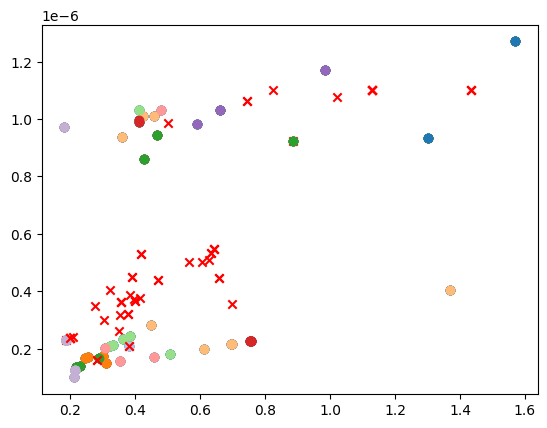

In [145]:
K = 4
epsilon = 0.05
iter_max = 1000

for i in range(1,11):
    print("K = " + str(i) )
    les_centres, l_affectation = clust.kmoyennes(i, data_viande, epsilon, iter_max)
    clust.affiche_resultat(data_viande,les_centres,l_affectation)
    idu = clust.dunn_index(les_centres, l_affectation)
    print(str(idu))
    ix = clust.xie_beni_index(les_centres, l_affectation)
    print(str(ix))

#print("Affichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(data_viande,les_centres,l_affectation)

In [139]:
idu = clust.dunn_index(les_centres, l_affectation)
print(str(idu))

0.16655706732958847


In [140]:
ix = clust.xie_beni_index(les_centres, l_affectation)
print(str(ix))

72.64292583672119


In [288]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';')
k=4
les_centres, l_affectation = clust.kmoyennes(k, data_viande, epsilon, iter_max)
ix = clust.xie_beni_index(les_centres, l_affectation)
print(str(ix))
idu = clust.dunn_index(les_centres, l_affectation)
print(str(idu))

def count_unique_values_column(array, column_index):
    unique_values = np.unique(array[:, column_index])
    return len(unique_values)

#print(str(count_unique_values_column(data_synthese, 'Groupe d\'aliment')))

for k in l_affectation:
    print()
    print("--------------- CHANGEMENT DE K --------------")
    print()
    for i in l_affectation[k]:
        e = data_viande_ref.iloc[i]
        print(e['Sous-groupe d\'aliment'])

iteration 0 Inertie : 439352.56934120826 Difference: 439352.56934120826
iteration 1 Inertie : 435724.78487709945 Difference: 3627.784464108816
iteration 2 Inertie : 435724.78487709945 Difference: 0.0
33.468706059826175
0.17397705562354288

--------------- CHANGEMENT DE K --------------

huiles et graisses végétales

--------------- CHANGEMENT DE K --------------

autres matières grasses
autres matières grasses
autres matières grasses
autres matières grasses
huiles et graisses végétales
huiles de poissons
huiles de poissons
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles et graisses végétales
huiles de poissons
huiles de poissons
autres matières grasses
beurres
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
margarines
autres matières grasses

--------------- CHANGEMENT DE K --------------

beurres
beurres
beurres
beurres
beurres
beurres
beurres
huiles et graisses végétales
huiles

### Essai

In [323]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-etapes.csv",sep=";")

#data_gras_ref = copy.deepcopy(data_synthese[data_synthese['Groupe d\'aliment'] == 'matières grasses'])
data_viande_ref = copy.deepcopy(data_synthese[data_synthese['Sous-groupe d aliment'] == 'feuilletées et autres entrées'])
#data_lait_ref = copy.deepcopy(data_synthese[data_synthese['Groupe d\'aliment'] == 'lait et produits laitiers'])
data_fruits_ref = copy.deepcopy(data_synthese[data_synthese['Sous-groupe d aliment'] == 'gâteaux et pâtisseries'])
data_algues_ref = copy.deepcopy(data_synthese[data_synthese['Sous-groupe d aliment'] == 'sandwichs'])

#X = pd.concat([data_gras_ref, data_viande_ref, data_lait_ref, data_fruits_ref])
X = pd.concat([data_viande_ref, data_fruits_ref, data_algues_ref])

X_ref = copy.deepcopy(X)

X.drop(['Code AGB', 'Code CIQUAL', 'Nom du Produit en Français', 'LCI Name',
        'DQR', 'Nom et code','Groupe d aliment', 'Sous-groupe d aliment',], axis=1, inplace = True)


In [330]:
X = pd.read_csv("data/AGRIBALYSE3-etapes.csv",sep=";")

X_ref = copy.deepcopy(X)

X.drop(['Code AGB', 'Code CIQUAL', 'Nom du Produit en Français', 'LCI Name',
        'DQR', 'Nom et code','Groupe d aliment', 'Sous-groupe d aliment',], axis=1, inplace = True)

iteration 0 Inertie : 1565748001.4935043 Difference: 1565748001.4935043
iteration 1 Inertie : 920536678.8962007 Difference: 645211322.5973036
iteration 2 Inertie : 553063955.684811 Difference: 367472723.21138966
iteration 3 Inertie : 461883733.35231715 Difference: 91180222.33249384
iteration 4 Inertie : 392510523.6542634 Difference: 69373209.69805378
iteration 5 Inertie : 350541473.7820565 Difference: 41969049.87220687
iteration 6 Inertie : 301677620.7566458 Difference: 48863853.02541071
iteration 7 Inertie : 273915671.9955483 Difference: 27761948.76109749
iteration 8 Inertie : 261694792.53927866 Difference: 12220879.456269652
iteration 9 Inertie : 254183823.17110947 Difference: 7510969.3681691885
iteration 10 Inertie : 193774663.04566818 Difference: 60409160.12544128
iteration 11 Inertie : 176082681.6901998 Difference: 17691981.355468392
iteration 12 Inertie : 158274894.81702942 Difference: 17807786.873170376
iteration 13 Inertie : 140114508.56319243 Difference: 18160386.25383699
iter

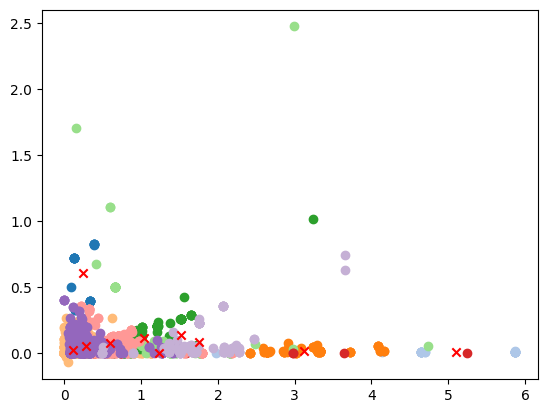

In [331]:
K = 10
epsilon = 0.05
iter_max = 1000

#for i in range(1,11):

#print("K = " + str(i) )
les_centres, l_affectation = clust.kmoyennes(K, X, epsilon, iter_max)
idu = clust.dunn_index(les_centres, l_affectation)
print(str(idu))
ix = clust.xie_beni_index(les_centres, l_affectation)
print(str(ix))

#print("Affichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

clust.affiche_resultat(X,les_centres,l_affectation)

In [332]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';')

def count_unique_values_column(array, column_index):
    unique_values = np.unique(array[:, column_index])
    return len(unique_values)

#print(str(count_unique_values_column(data_synthese, 'Groupe d\'aliment')))

for k in l_affectation:
    print()
    print("--------------- CHANGEMENT DE K --------------")
    print()
    for i in l_affectation[k]:
        e = X_ref.iloc[i]
        print(e['Groupe d aliment'])


--------------- CHANGEMENT DE K --------------

boissons
boissons
boissons
boissons
fruits. légumes. légumineuses et oléagineux
fruits. légumes. légumineuses et oléagineux
matières grasses
matières grasses
produits sucrés
produits sucrés
produits sucrés
produits sucrés
produits sucrés
produits sucrés
produits sucrés
produits sucrés
produits sucrés
produits sucrés
produits sucrés
produits sucrés
produits sucrés

--------------- CHANGEMENT DE K --------------

fruits. légumes. légumineuses et oléagineux
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œufs. poissons
viandes. œuf